# Linear Regression: CS229
Here some exercises taken from [Stanford CS229](http://cs229.stanford.edu/materials.html) ML classes

## Problem Set #1

### ex.1
Here only practical exercises are reported. For calculus/algebra-based exercises I usually use my pen and notebook

In [60]:
# import some useful stuff
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# some numpy practice and toy example on the different components
x = np.array([[1., 1., 2.],
              [1., 3., 4.]])
theta = np.array([4., 5., 6.])
y = np.array([[0.],
             [1.]])

# some "cosmetics" to ease the matrix algebra
theta = theta.reshape(theta.size,1)

print("- basics -")
print(x.shape)
print(theta.shape)
print(y.shape)
print("- (theta)T * x(i)-")
tTx = np.sum(np.transpose(theta)*x, axis=-1)
print(tTx.shape)
print(tTx)
print("- y(i) * (theta)T * x(i) -")
exp = np.transpose(y)*tTx
print(exp.shape)
print(exp)
print("- h(y(i)x(i)) -")
h = 1./(1.+np.exp(-y*np.sum(tTx, axis = -1)))
#yx = np.transpose(y)*x
yx = y*x
print(yx.shape)
hh = 1./(1+np.exp(-np.sum(np.transpose(theta)*yx, axis = -1)))
print(h.shape)
print(h)
print(hh.shape)
print(hh)
print("- gradient -")
g = np.sum( h*y*x, axis = 0)
# it is useful to reshape hh so that the function "h" can be defined only once and
# can operate both on "x" and on "xy", as needed for the Hessian
gg = np.sum( hh.reshape(hh.size,1)*y*x, axis = 0)
print(g.shape)
print(g)
print(gg.shape)
print(gg)
print("- hessian -")
tTx = tTx.reshape(tTx.size,1)
print(tTx)
hx = 1./(1.+np.exp(-np.sum(tTx, axis = -1)))
hx = hx.reshape(hx.size,1)
print(hx.shape)
print(hx)
out_list = []
print(x.shape[0])
for line in range(x.shape[0]):
    print(x[line,:].shape)
    print(x[line,:])
    out_i = np.outer(x[line,:],x[line,:])
    print(out_i.shape)
    print(out_i)
    out_list.append(out_i)
out = np.array(out_list)
print(out.shape)
hes = np.zeros_like(out)
for entry in range(out.shape[0]):
    hes += np.sum( hx[entry] * (1 - hx[entry]) * out[entry,:,:], axis = 0)
print(hes.shape)
print(hes)
realhes = np.sum(hes, axis = 0)
print(realhes.shape)
print(realhes)

a = np.array([0.5])
mat1 = np.array(range(9))
mat1 = mat1.reshape(3,3)
print(mat1)

mat2 = np.array(range(9))
mat2 = mat2.reshape(3,3)

mat1 = a*mat1
mat1 += mat2

print(mat1)


g = np.array([1,1,1])
print(g.shape)

- basics -
(2, 3)
(3, 1)
(2, 1)
- (theta)T * x(i)-
(2,)
[ 21.  43.]
- y(i) * (theta)T * x(i) -
(1, 2)
[[  0.  43.]]
- h(y(i)x(i)) -
(2, 3)
(2, 1)
[[ 0.5]
 [ 1. ]]
(2,)
[ 0.5  1. ]
- gradient -
(3,)
[ 1.  3.  4.]
(3,)
[ 1.  3.  4.]
- hessian -
[[ 21.]
 [ 43.]]
(2, 1)
[[ 1.]
 [ 1.]]
2
(3,)
[ 1.  1.  2.]
(3, 3)
[[ 1.  1.  2.]
 [ 1.  1.  2.]
 [ 2.  2.  4.]]
(3,)
[ 1.  3.  4.]
(3, 3)
[[  1.   3.   4.]
 [  3.   9.  12.]
 [  4.  12.  16.]]
(2, 3, 3)
(2, 3, 3)
[[[  3.03302450e-09   3.03302450e-09   6.06604899e-09]
  [  3.03302450e-09   3.03302450e-09   6.06604899e-09]
  [  3.03302450e-09   3.03302450e-09   6.06604899e-09]]

 [[  3.03302450e-09   3.03302450e-09   6.06604899e-09]
  [  3.03302450e-09   3.03302450e-09   6.06604899e-09]
  [  3.03302450e-09   3.03302450e-09   6.06604899e-09]]]
(3, 3)
[[  6.06604899e-09   6.06604899e-09   1.21320980e-08]
 [  6.06604899e-09   6.06604899e-09   1.21320980e-08]
 [  6.06604899e-09   6.06604899e-09   1.21320980e-08]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[  0.    1

here define the generalized Newton's method (i.e. the Newton-Raphson method)

$ \theta := \theta - H^{-1}\nabla_{\theta}f(\theta) $

where $H$ is the Hessian and $\nabla_{\theta}$ are the Hessian and the gradient respectively (always calculated wrt/ $\theta$)

Doing all the math, one obtains the following:

$ \frac{\partial}{\partial\theta_k}J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} h_{\theta}({-y^{(i)}x^{(i)}})y^{(i)}x^{(i)}_{k} $

$ H = \frac{1}{m}\sum_{i=1}^{m}h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)}))x^{(i)}x^{(i)T} $

where $h_{\theta}(x^{(i)}) = \frac{1}{1 + \exp(-\theta^{T}x^{(i)})}$

In [62]:
# take as input x, y, the initial thetas and the number of iterations and performs minimisation
# x, y and theta are numpy arrays

def htheta(x, theta):
    # htheta stands fot the "h_{\theta}(x)" function
    h = 1./(1+np.exp(-np.sum(np.transpose(theta)*x, axis = -1)))
    # see in the practice cell why it is useful to reshape h
    return h.reshape(h.size,1)

def Hess(x, theta):
    # calculate outer products and store them into matrices
    out_list = []
    for line in range(x.shape[0]):
        out_list.append(np.outer(x[line,:],x[line,:]))
    out = np.array(out_list)
    #print('outer prod')
    #print(out)
    
    # calculate the terms of the sum
    tmp = np.zeros_like(out)
    for entry in range(out.shape[0]):
        tmp[entry] = htheta(x, theta)[entry] * (1 - htheta(x, theta)[entry]) * out[entry,:,:]
    # sum!
    hes = np.sum(tmp, axis = 0)
    return hes

def Newton(x, y, theta, n_iters):
    mm = x.shape[0]
    for i in range(n_iters):
        # grad stands for gradient
        # hess stands for Hessian
        grad = -1./mm * np.sum( htheta(-y*x, theta)*y*x, axis = 0 )
        hess = 1./mm * Hess(x, theta)
        theta = theta - np.linalg.inv(hess).dot(grad)
        #theta.reshape(theta.size,1)
    return theta

In [63]:
# now load data
x = np.loadtxt('../data/CS229_PS1_ex1_logistic_x.txt')
y = np.loadtxt('../data/CS229_PS1_ex1_logistic_y.txt')

## some cosmetics
y_train = y.reshape(y.size, 1)

# add intercept term to x
intercept = np.ones(x.shape[0]).reshape(x.shape[0],1)
x_train = np.hstack((intercept, x))
#x_train = x_train[0:2,:]
#y_train = y_train[0:2,:]
print('x:')
print(x_train.shape)
#print(x_train)

print('y:')
print(y_train.shape)
#print(y_train)

# initialize theta at '0'
theta = np.zeros(x_train.shape[1])
print('theta')
#theta = theta.reshape(x_train.shape[1],1)
print(theta.shape)
#print(theta)

x:
(99, 3)
y:
(99, 1)
theta
(3,)


In [64]:
# now run ...
best_theta = Newton(x_train, y_train, theta, 10)
print(best_theta.shape)
print(best_theta)

(3,)
[-2.6205116   0.76037154  1.17194674]


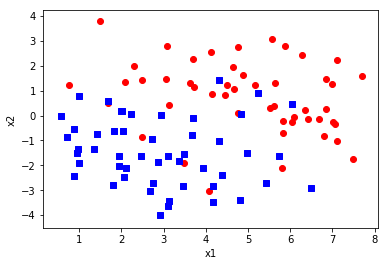

In [79]:
# now plot the data
plt.scatter(x[y==1][:,0],x[y==1][:,1],c='r',marker='o')
plt.scatter(x[y==-1][:,0],x[y==-1][:,1],c='b',marker='s')
plt.xlabel('x1')
plt.ylabel('x2')


The regression is performed with:

$ y = \theta_0 + \theta_{1}x_1 + \theta_{2}x_2 $

so the separation line between the two categories is $ y = 0 $, therefore:

$ x_2 = -\frac{\theta_1}{\theta_2}x_1 -\frac{\theta_0}{\theta_2} $

[-2.6205116   0.76037154  1.17194674]


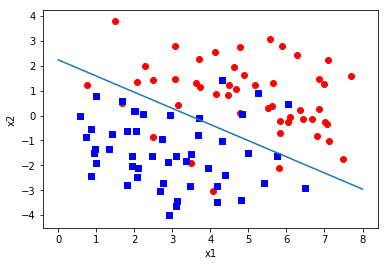

In [85]:
# the scatter plot is copied from above :)
plt.scatter(x[y==1][:,0],x[y==1][:,1],c='r',marker='o')
plt.scatter(x[y==-1][:,0],x[y==-1][:,1],c='b',marker='s')
plt.xlabel('x1')
plt.ylabel('x2')

# now implement the line
print(best_theta)

x1 = range(0,9)
x2 = [-best_theta[1]/best_theta[2]*xx - best_theta[0]/best_theta[2] for xx in x1]
plt.plot(x1, x2)
